In [17]:
# 필요한 패키지 설치

import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 300

In [18]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
df = pd.read_csv("datasets/superstore.csv")

# 데이터 샘플 확인
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
df['Date2']= pd.to_datetime(df['Order Date'],format="%d/%m/%Y") 

In [20]:
# date 컬럼 날짜형식 변환
# df['Date2']= pd.to_datetime(df['Order Date'],"%d/%m/%Y", format="%d/%m/%Y",infer_datetime_format=True) 
df['Date2']= pd.to_datetime(df['Order Date'],format="%d/%m/%Y") 
# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')
# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

## 선 그래프 용 데이터셋 생성
# 2018년 데이터만 필터링
df_line=df[df.Year == 2018]

# 2018년 일 별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


In [21]:
[str(x)[:7] for x in pd.date_range("2020-01-01", "2023-12-31",freq="ME")]

['2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10',
 '2022-11',
 '2022-12',
 '2023-01',
 '2023-02',
 '2023-03',
 '2023-04',
 '2023-05',
 '2023-06',
 '2023-07',
 '2023-08',
 '2023-09',
 '2023-10',
 '2023-11',
 '2023-12']

In [22]:
import datetime
datetime.datetime.now().weekday()

2

In [23]:
df['Date2'].apply(lambda x : x.weekday())
# 시간이 유럽식인지 한국식인지 중요하

7980    5
741     6
740     6
739     6
1759    0
       ..
1297    6
906     6
645     6
908     6
5091    6
Name: Date2, Length: 9800, dtype: int64

In [24]:
df['Date2']

7980   2015-01-03
741    2015-01-04
740    2015-01-04
739    2015-01-04
1759   2015-01-05
          ...    
1297   2018-12-30
906    2018-12-30
645    2018-12-30
908    2018-12-30
5091   2018-12-30
Name: Date2, Length: 9800, dtype: datetime64[ns]

<Axes: xlabel='Date2'>

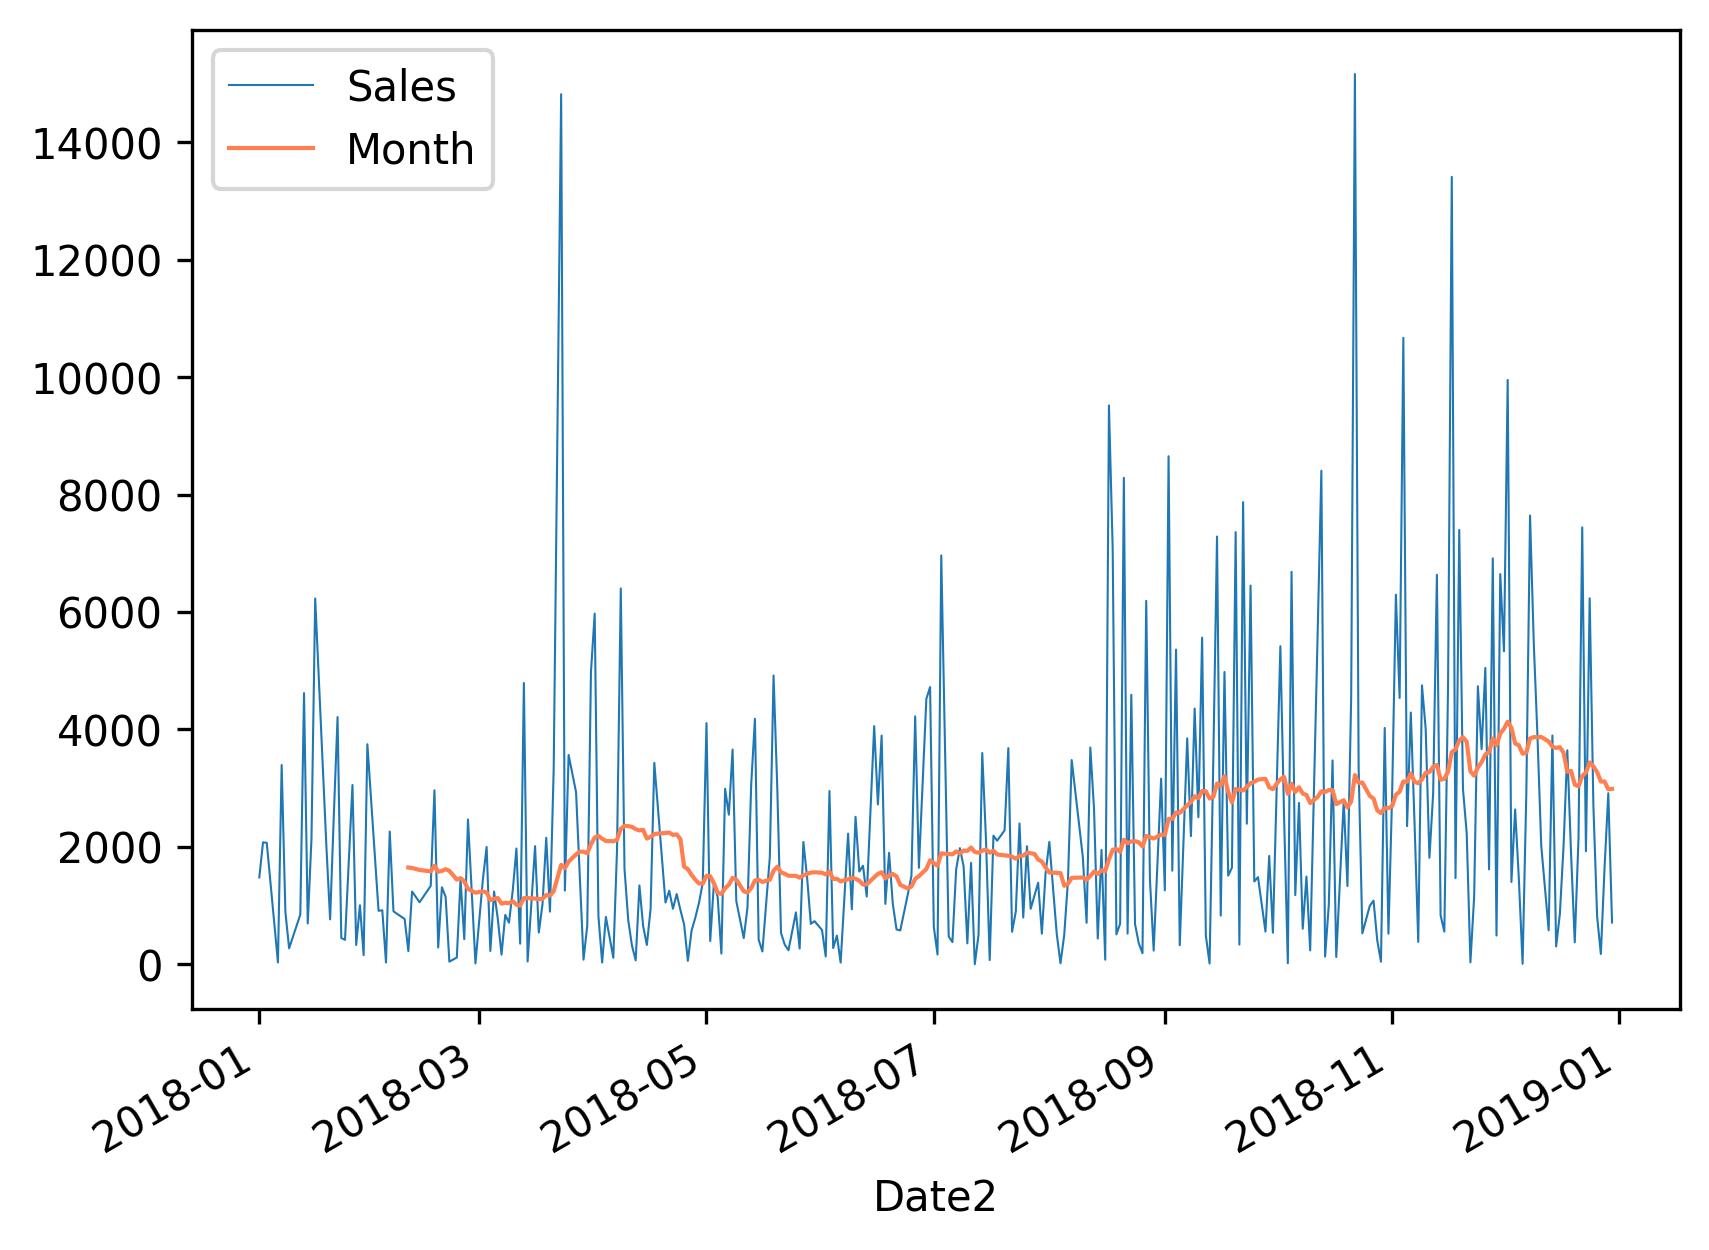

In [30]:
# 30일 이동평균 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

# 선 그래프 시각화
ax = df_line.plot(x='Date2', y='Sales',linewidth = "0.5")
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth = "1", ax=ax)

In [31]:
# 연도 별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


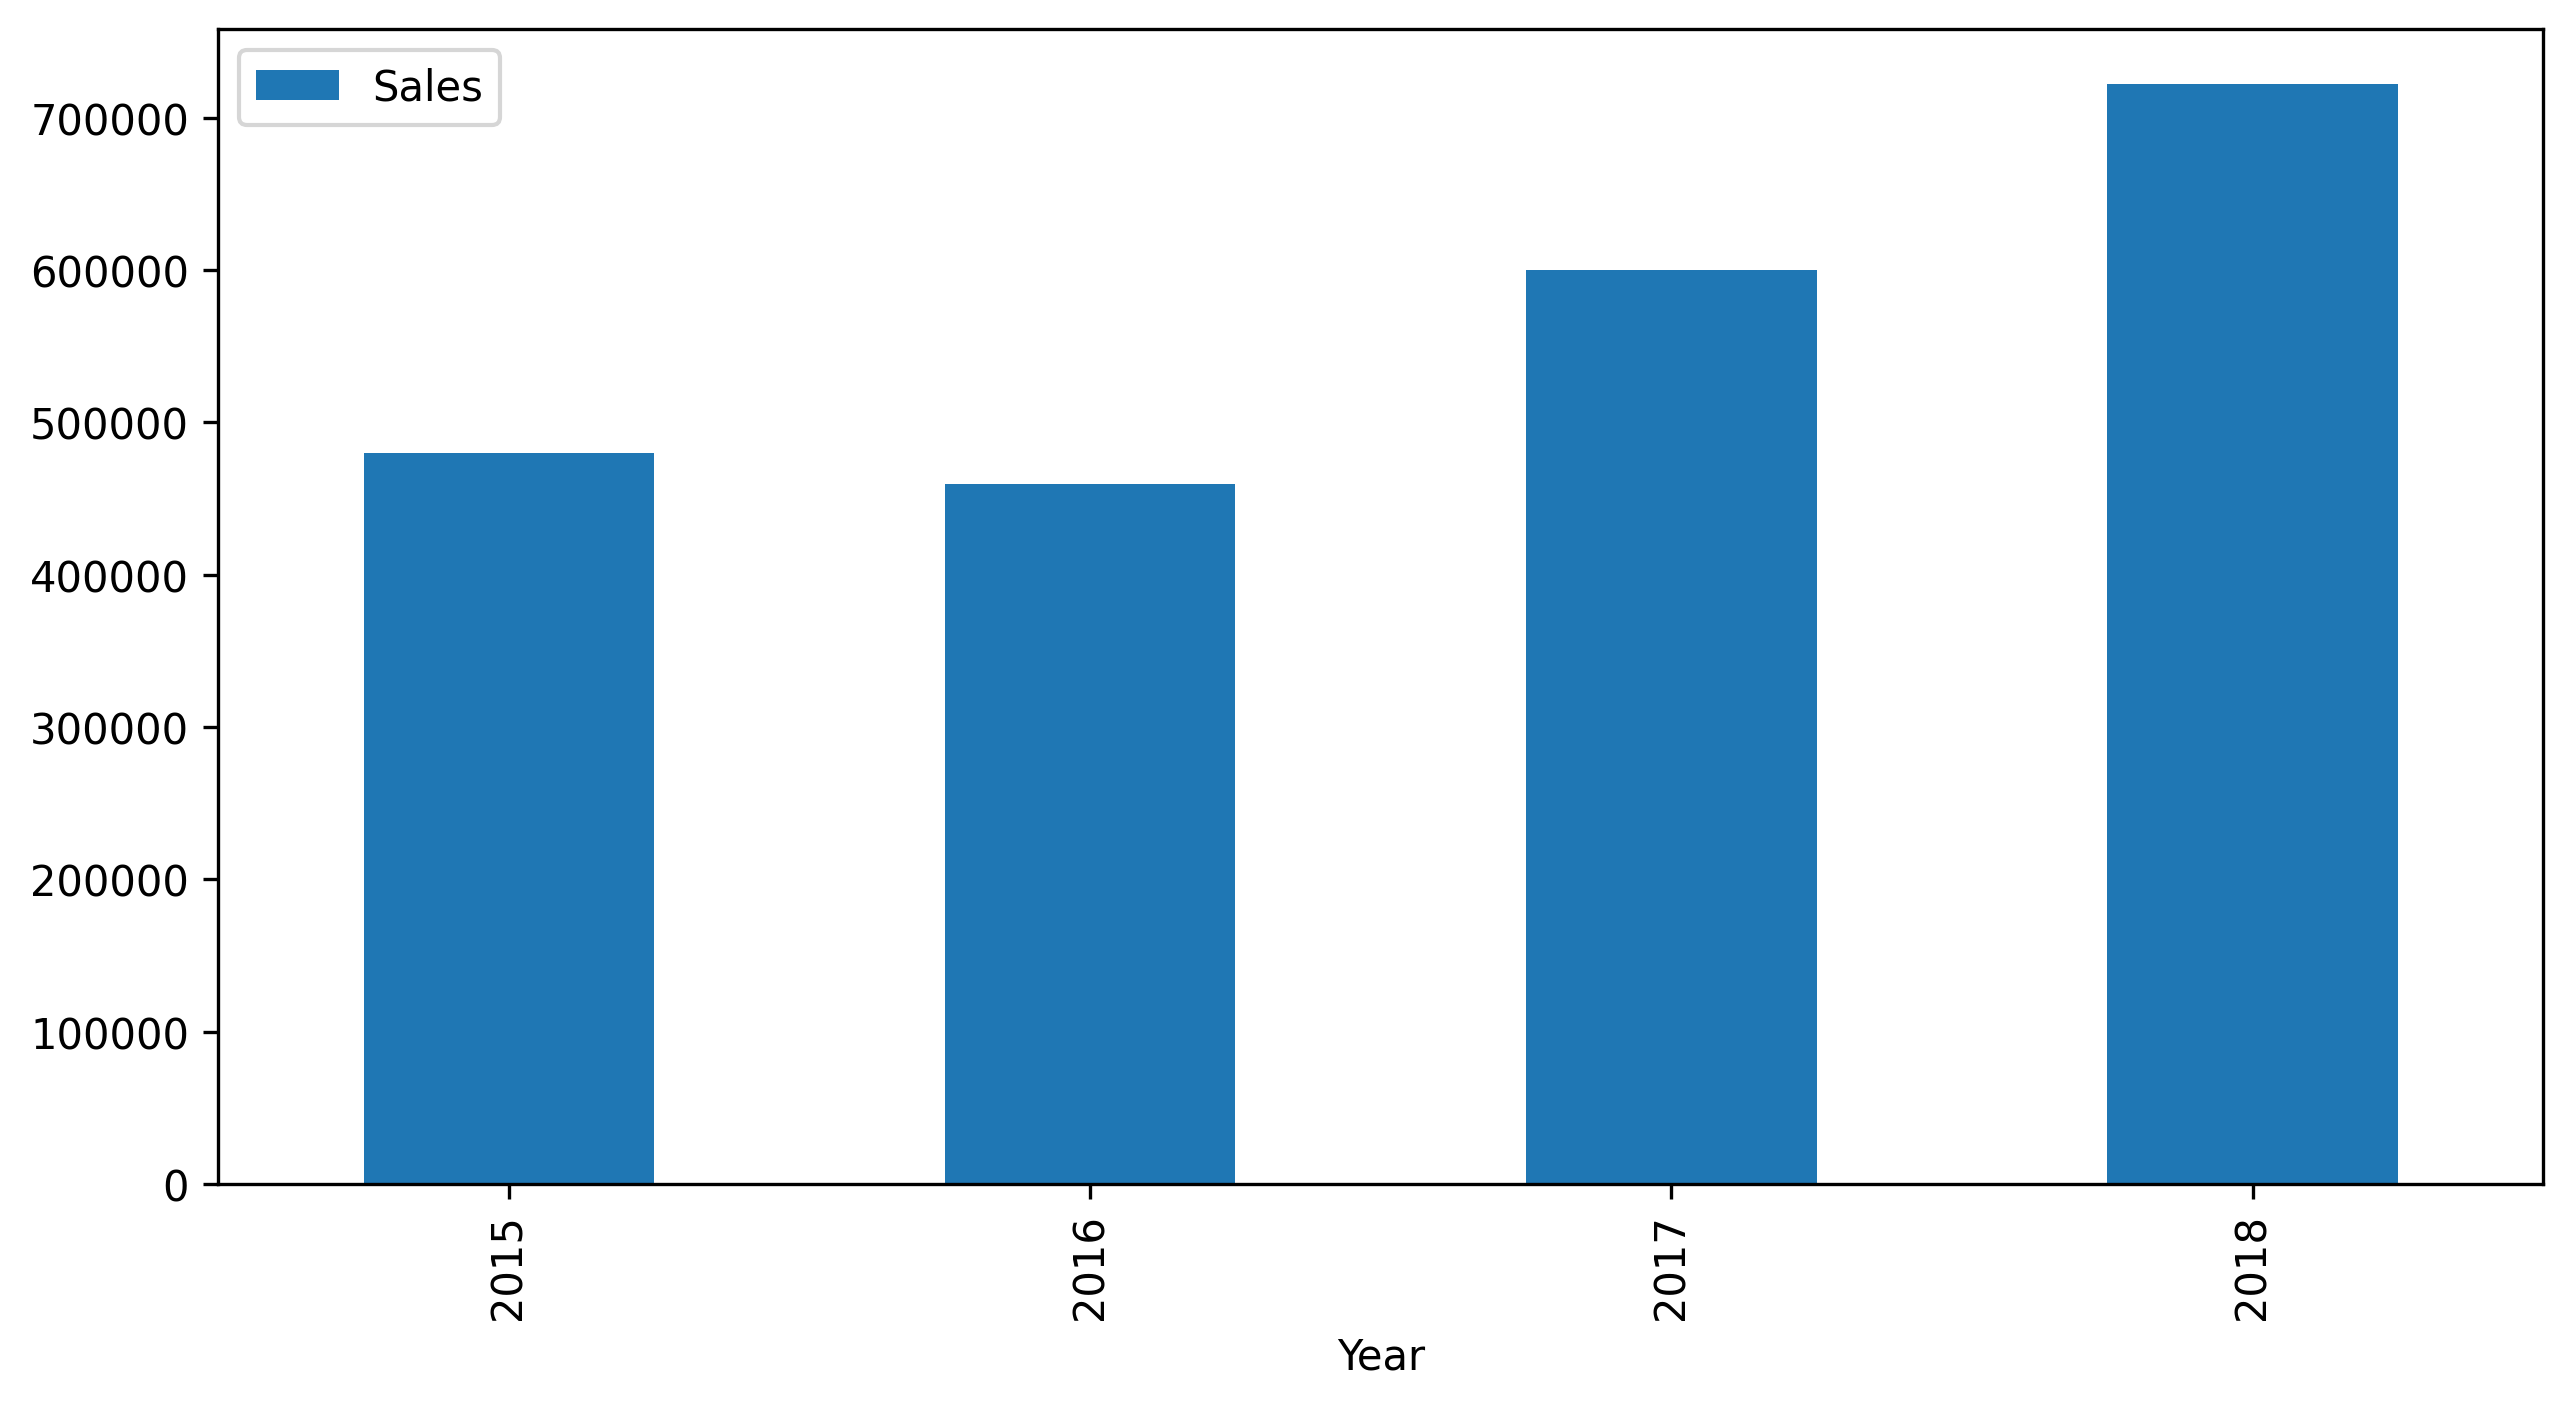

In [32]:
# 연도 별 매출액 막대 그래프 시각화
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=90, figsize=(10,5))

In [33]:
#연도별, 고객 세그먼트 별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df_bar_2.pivot(index='Year', 
                             columns='Segment', 
                             values='Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='Year'>

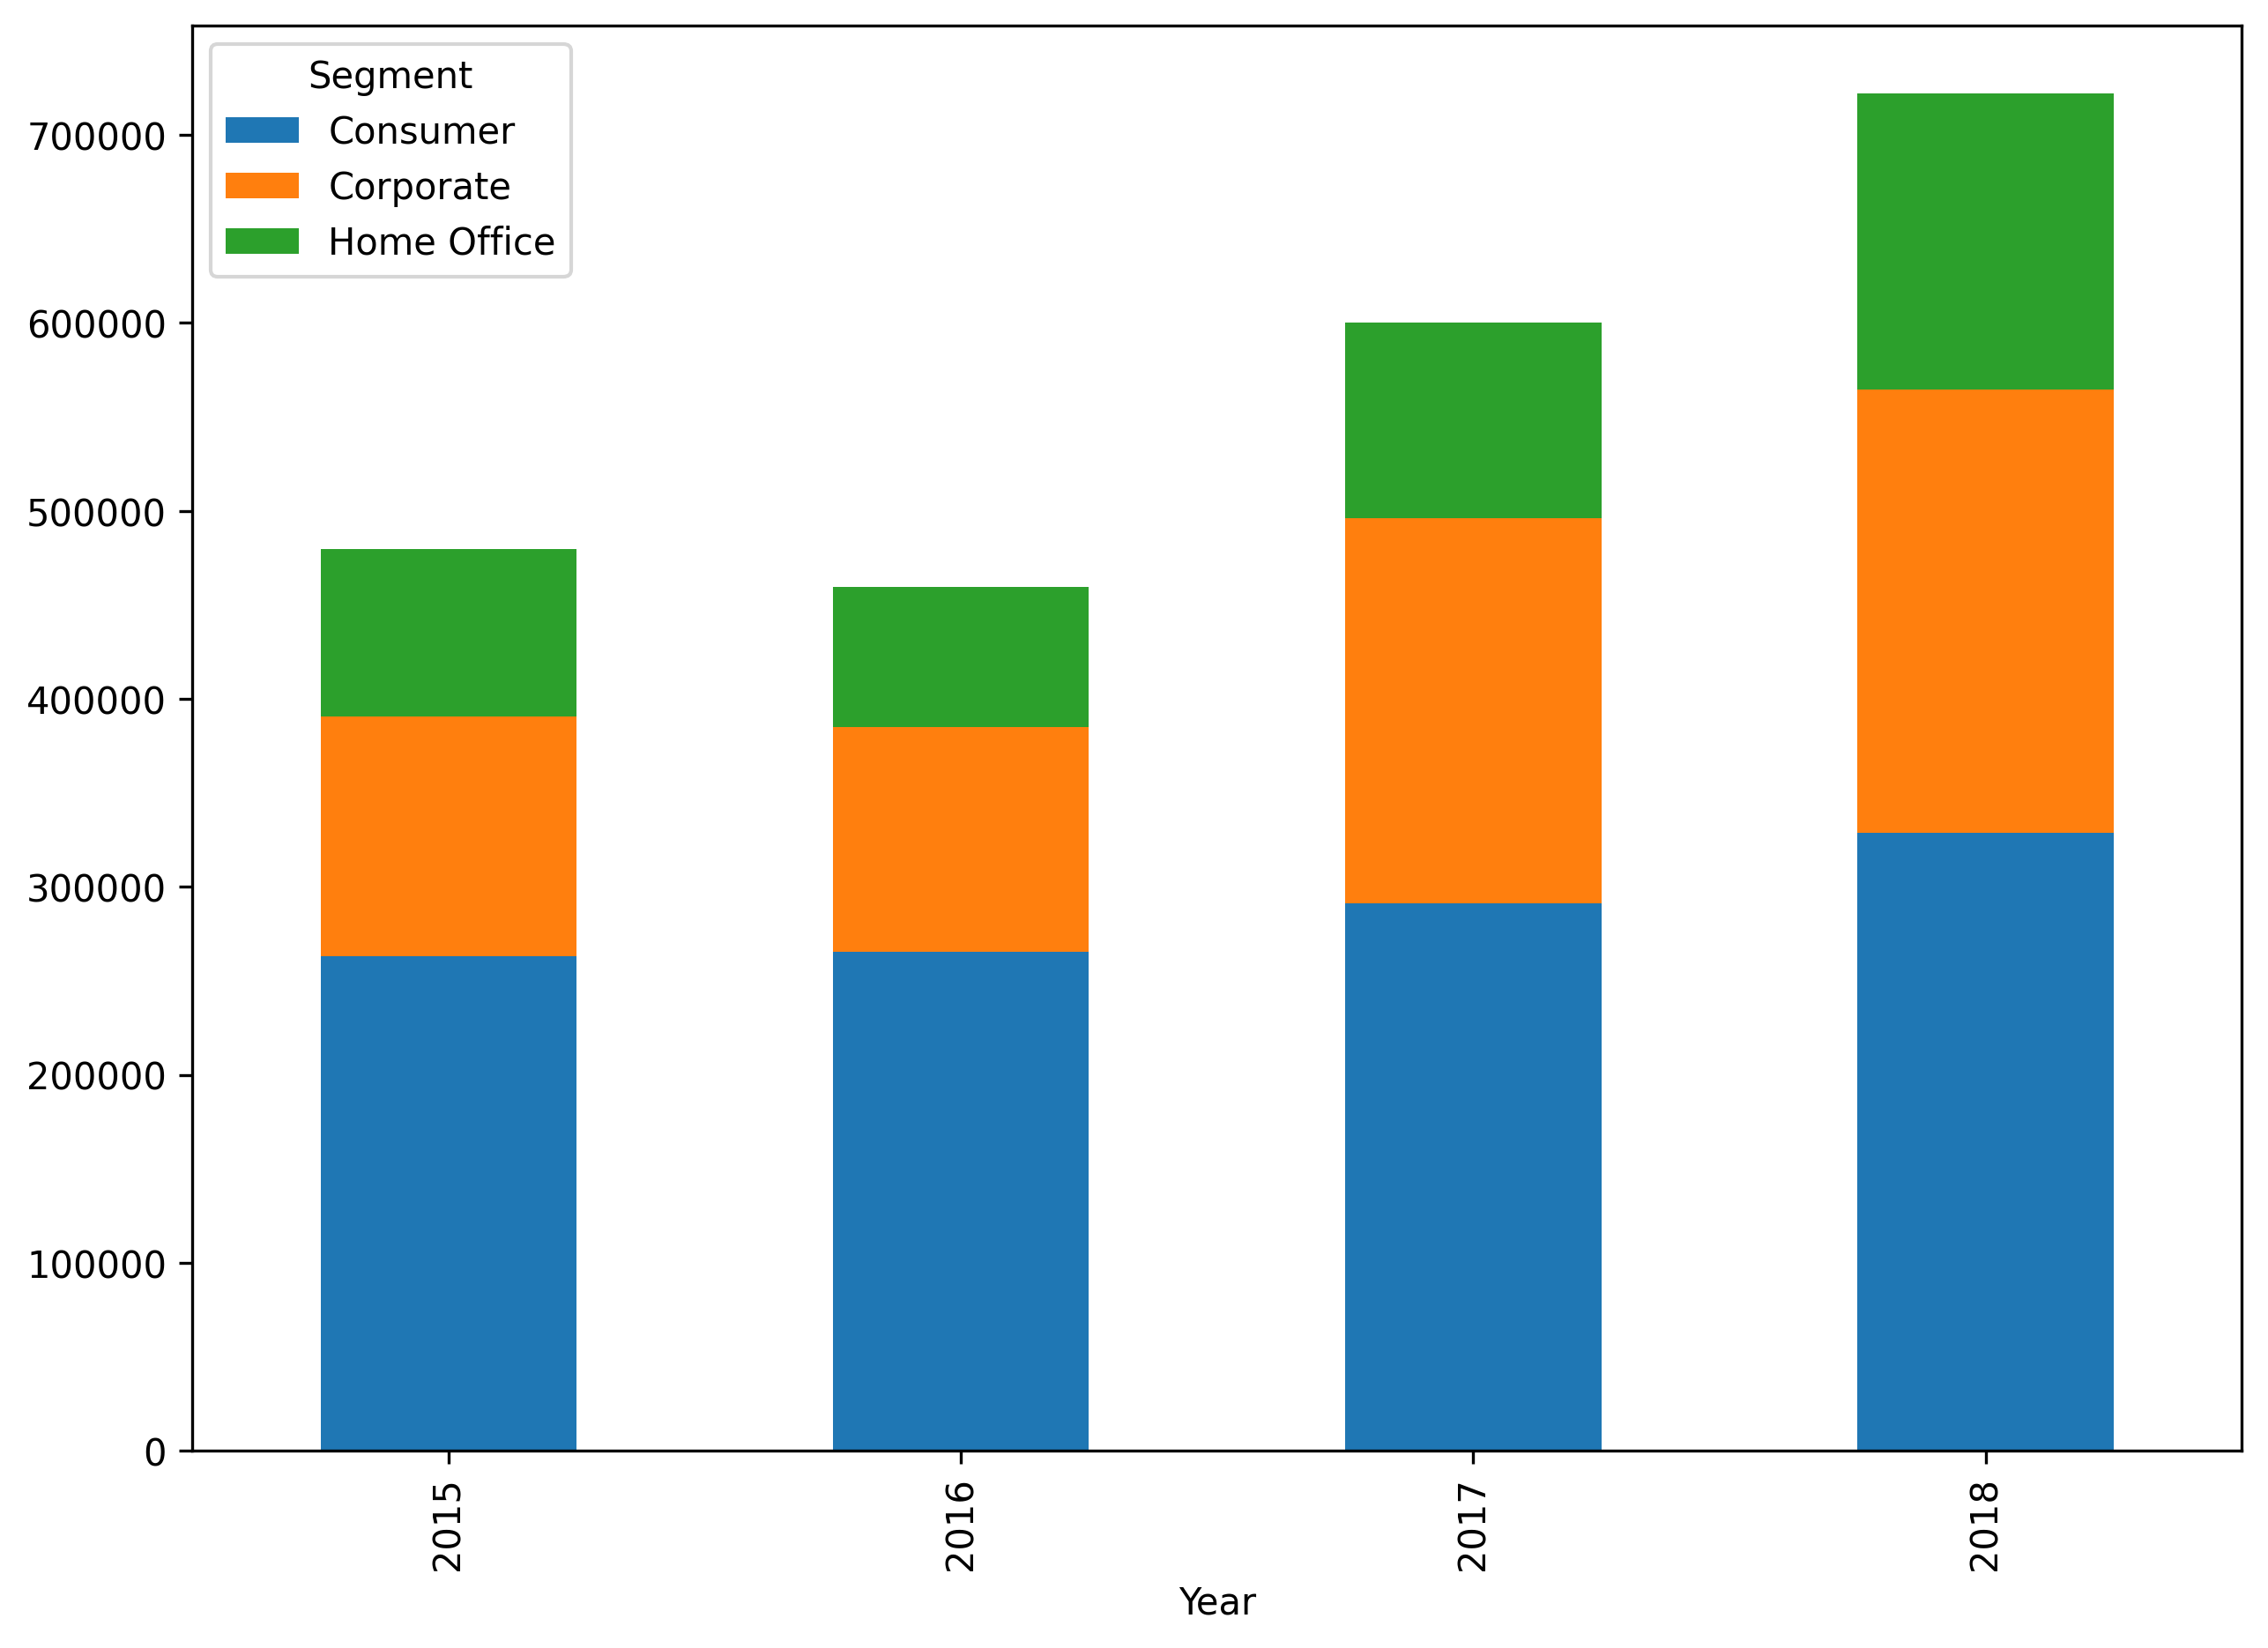

In [29]:
# 연도 별 고객 세그먼트 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10,7))

<Axes: xlabel='Year'>

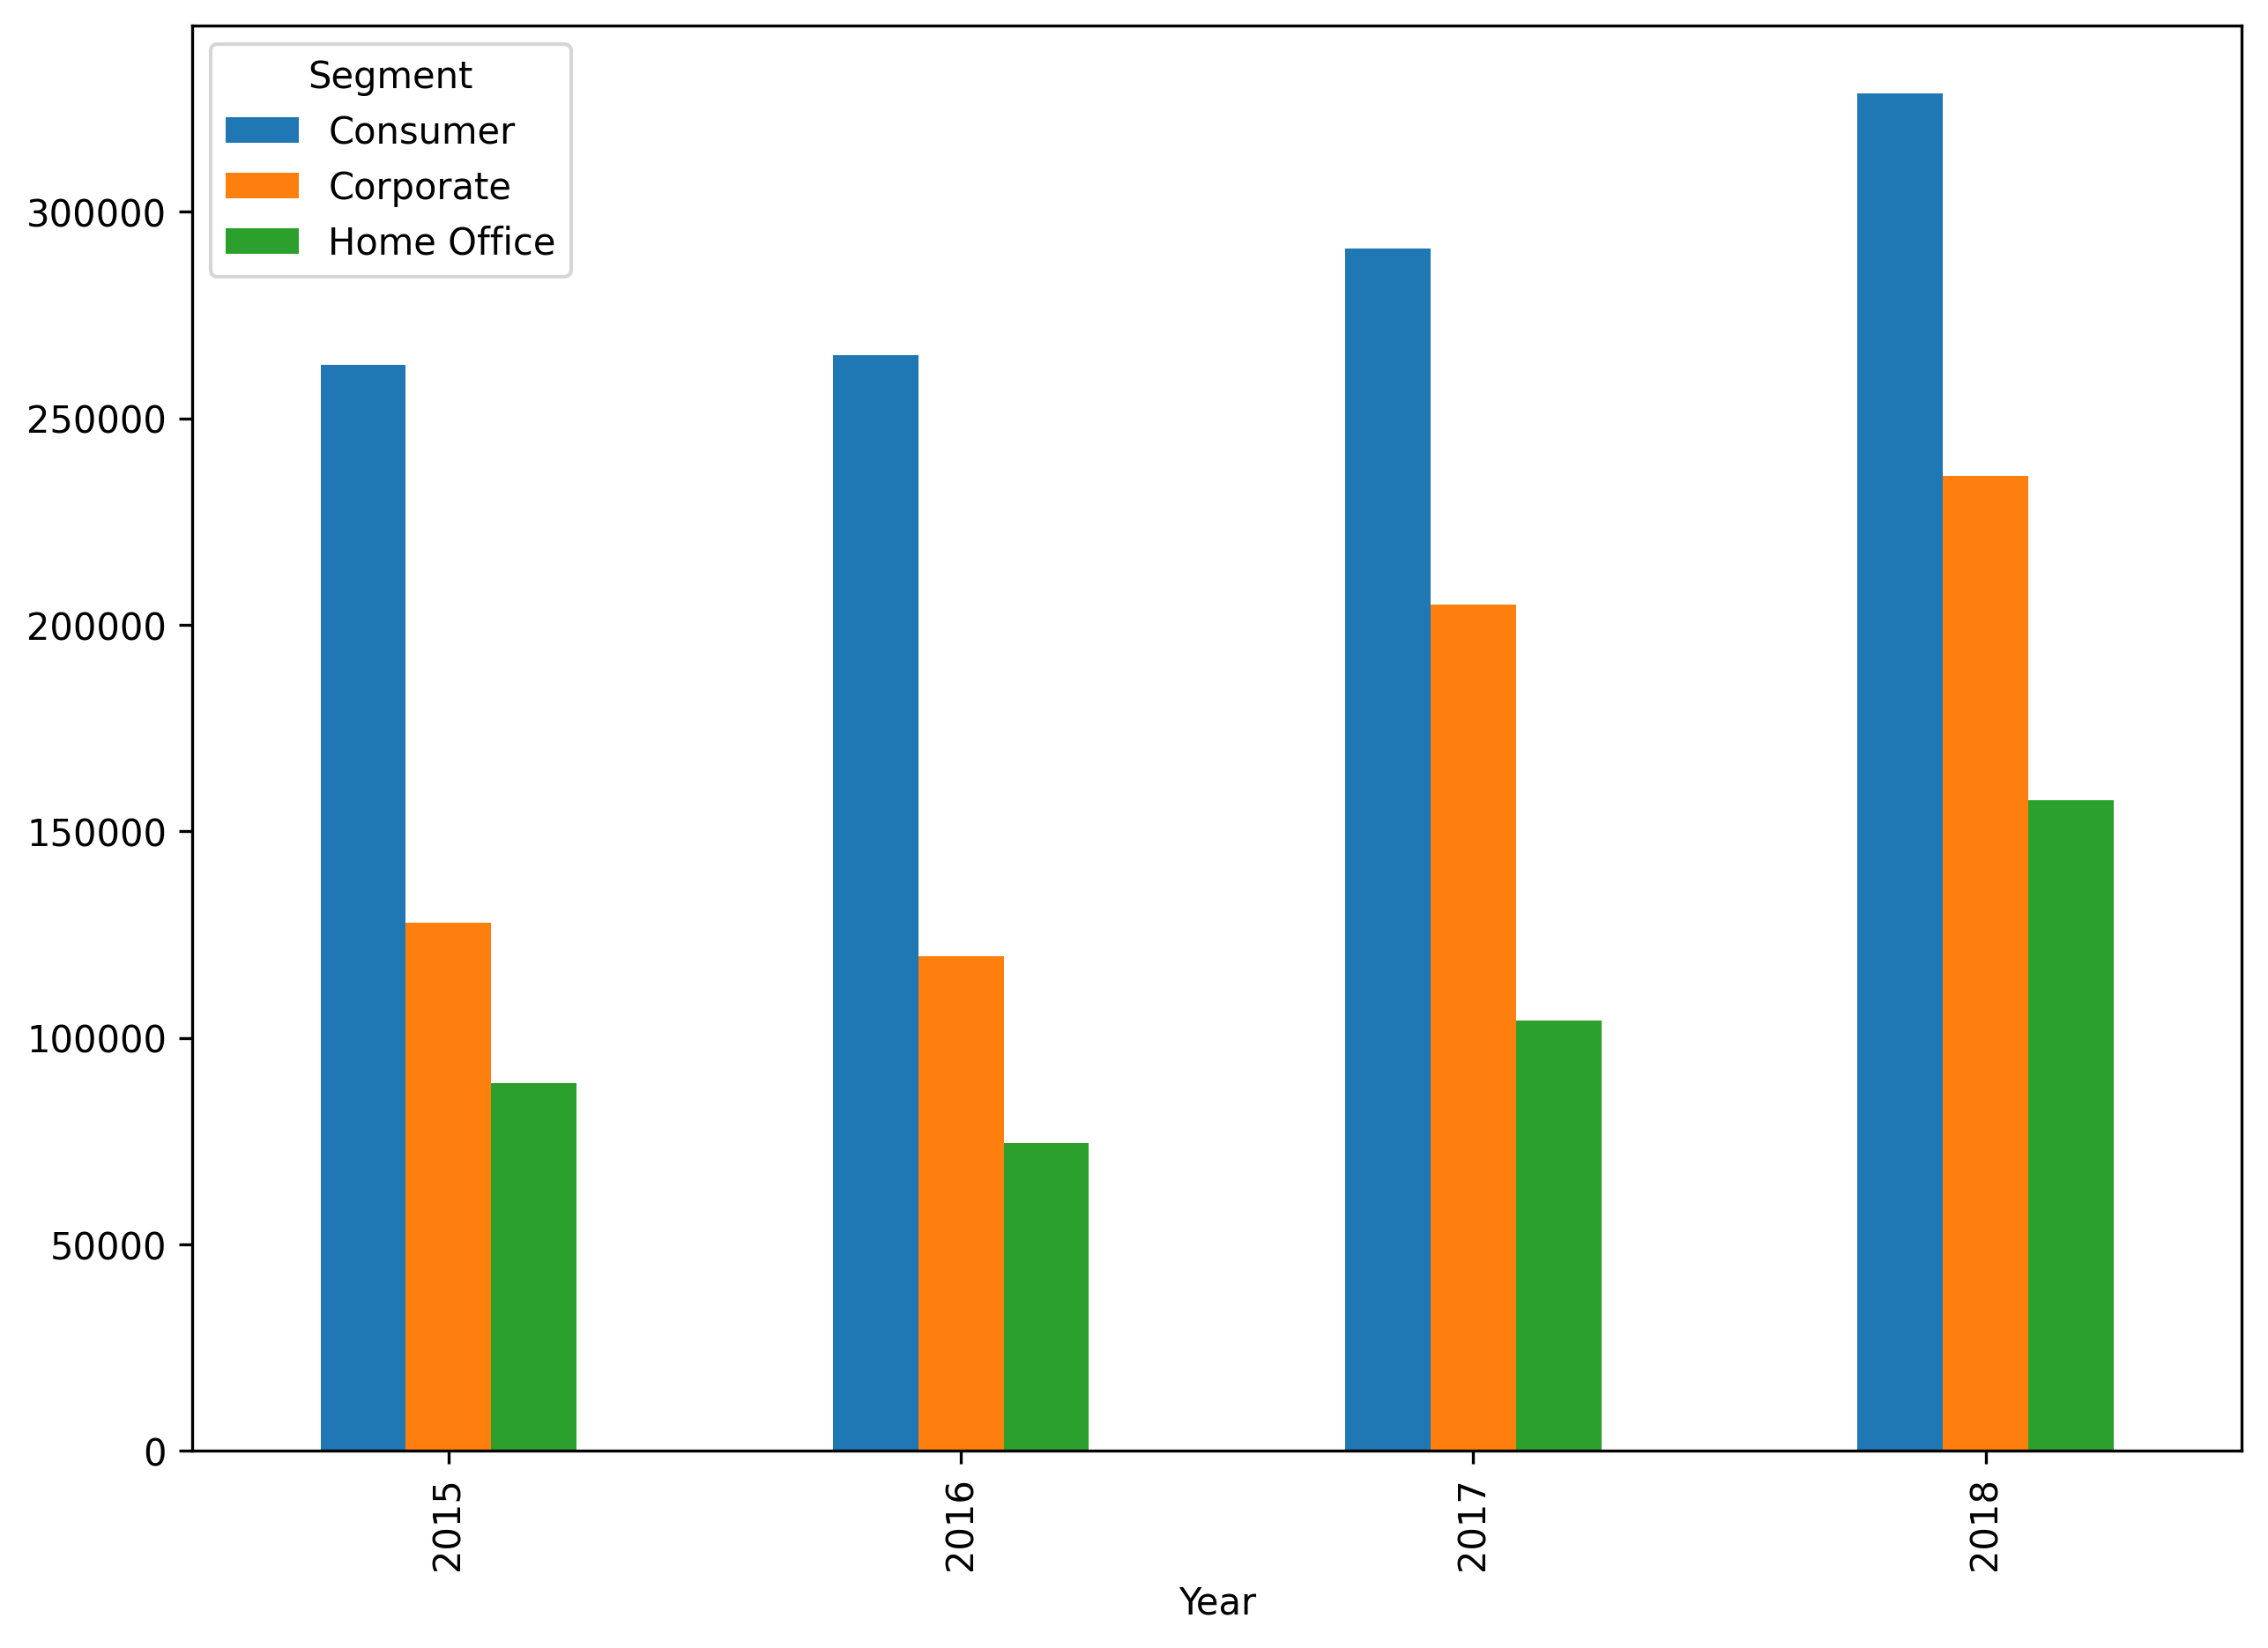

In [34]:
# 연도 별 고객 세그먼트 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=False, figsize=(10,7))

In [43]:
#앞에 있는 데이터를 가져와죠
df_line["Month"] = df_line["Month"].fillna(method="bfill")

/tmp/ipykernel_2899/1955831107.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_line["Month"] = df_line["Month"].fillna(method="bfill")


In [44]:
df_line.isnull().sum()

Date2    0
Sales    0
Month    0
dtype: int64

In [45]:
import numpy as np
df_line.loc[1,"Sales"] = np.nan

In [47]:
#시계열데이터의 결측치를 채울때 쓰는 거다
?df_line.Sales.interpolate

Signature:
df_line.Sales.interpolate(
    method: 'InterpolateOptions' = 'linear',
    *,
    axis: 'Axis' = 0,
    limit: 'int | None' = None,
    inplace: 'bool_t' = False,
    limit_direction: "Literal['forward', 'backward', 'both'] | None" = None,
    limit_area: "Literal['inside', 'outside'] | None" = None,
    downcast: "Literal['infer'] | None | lib.NoDefault" = <no_default>,
    **kwargs,
) -> 'Self | None'
Docstring:
Fill NaN values using an interpolation method.

Please note that only ``method='linear'`` is supported for
DataFrame/Series with a MultiIndex.

Parameters
----------
method : str, default 'linear'
    Interpolation technique to use. One of:

    * 'linear': Ignore the index and treat the values as equally
      spaced. This is the only method supported on MultiIndexes.
    * 'time': Works on daily and higher resolution data to interpolate
      given length of interval.
    * 'index', 'values': use the actual numerical values of the index.
    * 'pad': Fill in NaN

In [46]:
df_line

,Date2,Sales,Month
0,2018-01-01,1481.8280,1650.435267
1,2018-01-02,NaN,1650.435267
2,2018-01-03,2070.2720,1650.435267
3,2018-01-06,33.7400,1650.435267
4,2018-01-07,3395.5900,1650.435267
...,...,...,...
317,2018-12-26,814.5940,3276.087267
318,2018-12-27,177.6360,3113.736067
319,2018-12-28,1657.3508,3115.039293
320,2018-12-29,2915.5340,2981.792293


In [ ]:
#Bert